In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix

PART ONE - SUPERVISED LEARNING

Task 1: Load the dataset of kidney disease.

In [ ]:
# function that imports file, reads file, and prints some basic information about the data in the file including number of missing rows per column

def import_file(location):
  if isinstance(location, str):
    pd.set_option('display.max_columns', None)
    file_name = pd.read_csv(location)
    file_name = file_name.drop(file_name.columns[0], axis=1)
  print(f'The first three rows of the data are as follows: \n {file_name.head(3)}')
  # return file_name, file_name.isnull().sum().sort_values(ascending=False)
  print(file_name.info())
  print(f'Number of empty rows in each column include: \n {file_name.isnull().sum().sort_values(ascending=False)}')
  return file_name

# apply import_file function on the kidney file

target_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRWWcW0FKdZQSeiMmQkkgUO99Qzrb_-YsMTnFdqcyv_FFm53hILVfQNXztScVLLmHzvI5mXtoeawMtB/pub?output=csv'
data = import_file(target_url)

The first three rows of the data are as follows: 
     age    bp    sg   al   su     rbc      pc         pcc          ba    bgr  \
0  48.0  80.0  1.02  1.0  0.0     NaN  normal  notpresent  notpresent  121.0   
1   7.0  50.0  1.02  4.0  0.0     NaN  normal  notpresent  notpresent    NaN   
2  62.0  80.0  1.01  2.0  3.0  normal  normal  notpresent  notpresent  423.0   

     bu   sc  sod  pot  hemo pcv    wc   rc  htn   dm cad appet  pe  ane  \
0  36.0  1.2  NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good  no   no   
1  18.0  0.8  NaN  NaN  11.3  38  6000  NaN   no   no  no  good  no   no   
2  53.0  1.8  NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor  no  yes   

  classification  
0            ckd  
1            ckd  
2            ckd  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp

Task 2: Rename the columns

In [ ]:
# function to rename columns in dataframe

def rename_columns(data, existing_columns, new_columns):
  for i in range(len(existing_columns)):
    data.rename(columns={existing_columns[i]: new_columns[i]}, inplace=True)
  return data.head(3)

# apply rename_columns function on the kidney dataset

new_column_names = {'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'}
existing_values = list(new_column_names.keys())
new_name_values = list(new_column_names.values())
rename_columns(data, existing_values, new_name_values)

age  blood_pressure  specific gravity  albumin  sugar red blood cells  \
0  48.0            80.0              1.02      1.0    0.0             NaN   
1   7.0            50.0              1.02      4.0    0.0             NaN   
2  62.0            80.0              1.01      2.0    3.0          normal   

  pus cell pus cell clumps    bacteria  blood glucose random  blood urea  \
0   normal      notpresent  notpresent                 121.0        36.0   
1   normal      notpresent  notpresent                   NaN        18.0   
2   normal      notpresent  notpresent                 423.0        53.0   

   serum creatinine  sodium  potassium  hemoglobin packed cell volume  \
0               1.2     NaN        NaN        15.4                 44   
1               0.8     NaN        NaN        11.3                 38   
2               1.8     NaN        NaN         9.6                 31   

  white blood cell count red blood cell count hypertension diabetes mellitus  \
0                   7800                  5.2          yes               yes   
1                   6000                  NaN           no                no   
2                   7500                  NaN           no               yes   

  coronary artery disease appetite pedal edema anemia class  
0                      no     good          no     no   ckd  
1                      no     good          no     no   ckd  
2                      no     poor          no    yes   ckd

Data Cleaning and Pre-processing

The following cells are other data cleaning and pre-processing tasks not required by the checkpoint but considered necessary

In [ ]:
# function to check datatype

def check_dtype(data):
  for i in data.columns:
    categorical = data.select_dtypes(include='object')
    numerical = data.select_dtypes(exclude='object')
  # print(f'Categorical data include: \n {categorical.head(3)}')
  # print(f'Numerical data include: \n {numerical.head(3)}')
  return categorical, numerical

# apply the check_dtype function to the kidney dataset

cat_var, num_var = check_dtype(data)

In [ ]:
cat_var.head(3)

red blood cells pus cell pus cell clumps    bacteria packed cell volume  \
0             NaN   normal      notpresent  notpresent                 44   
1             NaN   normal      notpresent  notpresent                 38   
2          normal   normal      notpresent  notpresent                 31   

  white blood cell count red blood cell count hypertension diabetes mellitus  \
0                   7800                  5.2          yes               yes   
1                   6000                  NaN           no                no   
2                   7500                  NaN           no               yes   

  coronary artery disease appetite pedal edema anemia class  
0                      no     good          no     no   ckd  
1                      no     good          no     no   ckd  
2                      no     poor          no    yes   ckd

In [ ]:
num_var.head(5)

age  blood_pressure  specific gravity  albumin  sugar  \
0  48.0            80.0             1.020      1.0    0.0   
1   7.0            50.0             1.020      4.0    0.0   
2  62.0            80.0             1.010      2.0    3.0   
3  48.0            70.0             1.005      4.0    0.0   
4  51.0            80.0             1.010      2.0    0.0   

   blood glucose random  blood urea  serum creatinine  sodium  potassium  \
0                 121.0        36.0               1.2     NaN        NaN   
1                   NaN        18.0               0.8     NaN        NaN   
2                 423.0        53.0               1.8     NaN        NaN   
3                 117.0        56.0               3.8   111.0        2.5   
4                 106.0        26.0               1.4     NaN        NaN   

   hemoglobin  
0        15.4  
1        11.3  
2         9.6  
3        11.2  
4        11.6

When a column with figures is mistaken for a categorical column, it means some foreign characters considered as string are in that column e.g., symbols.

To check this assertion, we will print the unique items in the selected columns and address the foreign characters using the 'str.replace' method.

Thereafter, we will change the values in those columns to float type using the 'astype' method.

In [ ]:
data['packed cell volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [ ]:
data['white blood cell count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '10500', '4200', '4700', '10900', '8100',
       '9500', '2200', '12800', '11200', '19100', '?', '12300', '16700',
       '2600', '26400', '8800', '7400', '4900', '8000', '12000', '15700',
       '4100', '5700', '11500', '5400', '10800', '9900', '5200', '5900',
       '9300', '9700', '5100', '6600'], dtype=object)

In [ ]:
data['red blood cell count'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [ ]:
distorted_columns = ['packed cell volume','white blood cell count','red blood cell count']

for i in data.columns:
  if i in distorted_columns:
    data[i] = data[i].str.replace('?','0')
    data[i] = data[i].astype(float)

<ipython-input-10-45f025ad913a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[i] = data[i].str.replace('?','0')


In [ ]:
cat_var, num_var = check_dtype(data)
cat_var.head(3)

red blood cells pus cell pus cell clumps    bacteria hypertension  \
0             NaN   normal      notpresent  notpresent          yes   
1             NaN   normal      notpresent  notpresent           no   
2          normal   normal      notpresent  notpresent           no   

  diabetes mellitus coronary artery disease appetite pedal edema anemia class  
0               yes                      no     good          no     no   ckd  
1                no                      no     good          no     no   ckd  
2               yes                      no     poor          no    yes   ckd

In [ ]:
# function to fill null rows

def fill_null(data):
  cat = data.select_dtypes(include='object')
  num = data.select_dtypes(include='number')
  for i in cat:
    data[i].fillna(data[i].mode()[0],inplace=True)
  for i in num:
    data[i].fillna(data[i].mean(),inplace=True)

fill_null(data)
data.isnull().sum().sort_values(ascending=False)

age                        0
potassium                  0
anemia                     0
pedal edema                0
appetite                   0
coronary artery disease    0
diabetes mellitus          0
hypertension               0
red blood cell count       0
white blood cell count     0
packed cell volume         0
hemoglobin                 0
sodium                     0
blood_pressure             0
serum creatinine           0
blood urea                 0
blood glucose random       0
bacteria                   0
pus cell clumps            0
pus cell                   0
red blood cells            0
sugar                      0
albumin                    0
specific gravity           0
class                      0
dtype: int64

In [ ]:
# function that label encodes categorical data and standardises numerical data

def encoder(data):
  cat = data.select_dtypes(include='object')
  num = data.drop(data.columns[-1],axis=1).select_dtypes(exclude='object')
  encoder = LabelEncoder()
  for i in cat:
    data[i] = encoder.fit_transform(data[i])

  scaler = MinMaxScaler()
  for i in num:
    data[[i]] = scaler.fit_transform(data[[i]])

  return data

encoder(data)

age  blood_pressure  specific gravity  albumin  sugar  \
0    0.522727        0.230769              0.75      0.2    0.0   
1    0.056818        0.000000              0.75      0.8    0.0   
2    0.681818        0.230769              0.25      0.4    0.6   
3    0.522727        0.153846              0.00      0.8    0.0   
4    0.556818        0.230769              0.25      0.4    0.0   
..        ...             ...               ...      ...    ...   
395  0.602273        0.230769              0.75      0.0    0.0   
396  0.454545        0.153846              1.00      0.0    0.0   
397  0.113636        0.230769              0.75      0.0    0.0   
398  0.170455        0.076923              1.00      0.0    0.0   
399  0.636364        0.230769              1.00      0.0    0.0   

     red blood cells  pus cell  pus cell clumps  bacteria  \
0                  1         1                0         0   
1                  1         1                0         0   
2                  1         1                0         0   
3                  1         0                1         0   
4                  1         1                0         0   
..               ...       ...              ...       ...   
395                1         1                0         0   
396                1         1                0         0   
397                1         1                0         0   
398                1         1                0         0   
399                1         1                0         0   

     blood glucose random  blood urea  serum creatinine    sodium  potassium  \
0                0.211538    0.088575          0.010582  0.839298   0.047803   
1                0.269309    0.042362          0.005291  0.839298   0.047803   
2                0.856838    0.132221          0.018519  0.839298   0.047803   
3                0.202991    0.139923          0.044974  0.671924   0.000000   
4                0.179487    0.062901          0.013228  0.839298   0.047803   
..                    ...         ...               ...       ...        ...   
395              0.252137    0.121951          0.001323  0.917981   0.053933   
396              0.113248    0.075738          0.010582  0.861199   0.022472   
397              0.166667    0.062901          0.002646  0.835962   0.042697   
398              0.196581    0.124519          0.007937  0.823344   0.053933   
399              0.232906    0.042362          0.009259  0.861199   0.022472   

     hemoglobin  packed cell volume  white blood cell count  \
0      0.836735            0.814815                0.295455   
1      0.557823            0.703704                0.227273   
2      0.442177            0.574074                0.284091   
3      0.551020            0.592593                0.253788   
4      0.578231            0.648148                0.276515   
..          ...                 ...                     ...   
395    0.857143            0.870370                0.253788   
396    0.911565            1.000000                0.295455   
397    0.863946            0.907407                0.250000   
398    0.755102            0.944444                0.272727   
399    0.863946            0.981481                0.257576   

     red blood cell count  hypertension  diabetes mellitus  \
0                 0.65000             1                  1   
1                 0.58625             0                  0   
2                 0.58625             0                  1   
3                 0.48750             1                  0   
4                 0.57500             0                  0   
..                    ...           ...                ...   
395               0.61250             0                  0   
396               0.77500             0                  0   
397               0.67500             0                  0   
398               0.73750             0                  0   
399               0.76250             0                  0   

     coro

In [ ]:
data['class'].value_counts()

0    250
1    150
Name: class, dtype: int64

Feature Selection

In [ ]:
# function to select the best features using xgboost and selectKBest

def feature_selection(data):
  global x, y
  x = data.drop(data.columns[-1], axis=1)
  y = data.iloc[:,-1]

  # using xgb

  xgb_selector = XGBClassifier()
  xgb_selector.fit(x,y)
  importances = pd.DataFrame(xgb_selector.feature_importances_)
  features = pd.DataFrame(x.columns)
  feature_importances = pd.concat([features, importances], axis=1)
  feature_importances.columns = ['Features', 'XGB_importances']
  feature_importances = feature_importances.sort_values(by='XGB_importances', ascending=False)
  feature_importances = feature_importances.loc[feature_importances['XGB_importances'] >= 0.01]

  # using selectKBest

  best_feature = SelectKBest(score_func = f_classif, k = 'all')
  fitting = best_feature.fit(x,y)
  scores = pd.DataFrame(fitting.scores_)
  columns = pd.DataFrame(x.columns)
  feat_score = pd.concat([columns, scores], axis = 1)
  feat_score.columns = ['Feature', 'F_classif_score']
  feat_score = feat_score.nlargest(10, 'F_classif_score')
  feat_score.sort_values(by = 'F_classif_score', ascending = False)

  # selecting only features that showed up in both xgbClassifier and selectKBest

  global selected_features
  xgb_list = list(feature_importances.iloc[:,0])
  k_list = list(feat_score.iloc[:,0])
  selected_features = []

  for i in xgb_list:
    if i in k_list:
      selected_features.append(i)

  # mapping out selected features from the main kidney dataset

  selected_features = data[selected_features]

  return selected_features

feature_selection(data)

hemoglobin  specific gravity  hypertension  red blood cell count  \
0      0.836735              0.75             1               0.65000   
1      0.557823              0.75             0               0.58625   
2      0.442177              0.25             0               0.58625   
3      0.551020              0.00             1               0.48750   
4      0.578231              0.25             0               0.57500   
..          ...               ...           ...                   ...   
395    0.857143              0.75             0               0.61250   
396    0.911565              1.00             0               0.77500   
397    0.863946              0.75             0               0.67500   
398    0.755102              1.00             0               0.73750   
399    0.863946              1.00             0               0.76250   

     albumin  blood glucose random  packed cell volume  
0        0.2              0.211538            0.814815  
1        0.8              0.269309            0.703704  
2        0.4              0.856838            0.574074  
3        0.8              0.202991            0.592593  
4        0.4              0.179487            0.648148  
..       ...                   ...                 ...  
395      0.0              0.252137            0.870370  
396      0.0              0.113248            1.000000  
397      0.0              0.166667            0.907407  
398      0.0              0.196581            0.944444  
399      0.0              0.232906            0.981481  

[400 rows x 7 columns]

Modelling

Task 3: Apply logistic regression, and print the confusion matrix to validate your model.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



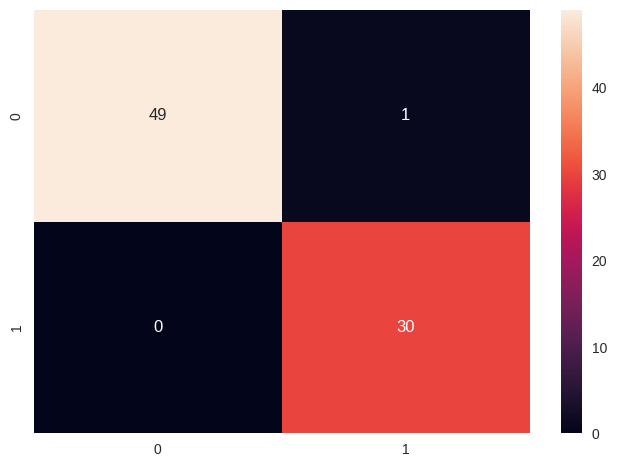

In [ ]:
# function that models using Logistic Regression and calculates accuracy and displays confusion matrix

def logreg(data):
  global x_train,x_test,y_train,y_test
  x_train, x_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.20, random_state=50, stratify=y)
  logreg = LogisticRegression()
  logreg.fit(x_train, y_train)

  lr_pred = logreg.predict(x_test)
  print(classification_report(y_test, lr_pred))
  sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True)

logreg(data)

Task 4: Apply KNN and choose the optimal number of neighbors

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



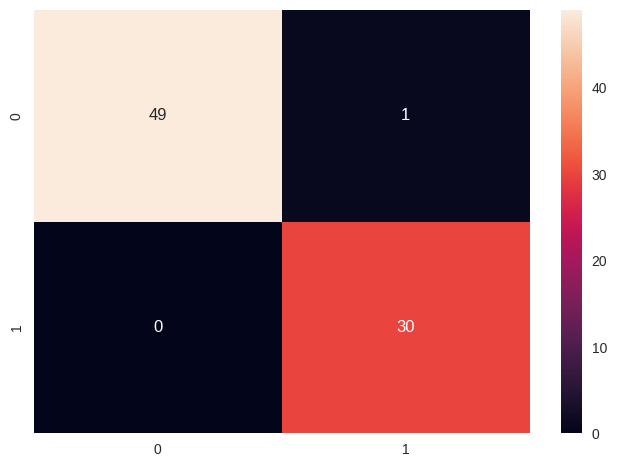

In [ ]:
# function that models using KNN and calculates accuracy and displays confusion matrix

def knn(data):
  knn = KNeighborsClassifier(15)
  knn.fit(x_train,y_train)

  knn_pred = knn.predict(x_test)
  print(classification_report(y_test, knn_pred))
  sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True)

knn(data)

Task 5: Apply decision tree, plot it and calculate the accuracy.

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



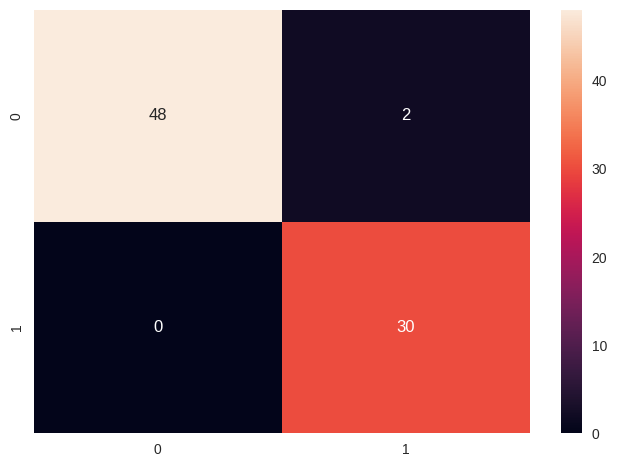

In [ ]:
# function that models using Decision Tree and calculates accuracy and displays confusion matrix

def dtree(data):
  dtree = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)
  dtree.fit(x_train,y_train)
  dtree_pred = dtree.predict(x_test)
  print(classification_report(y_test, dtree_pred))
  sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True)

dtree(data)

Task 6: Apply random forest, calculate the new accuracy and compare it with the previous result.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.97      0.98        31

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



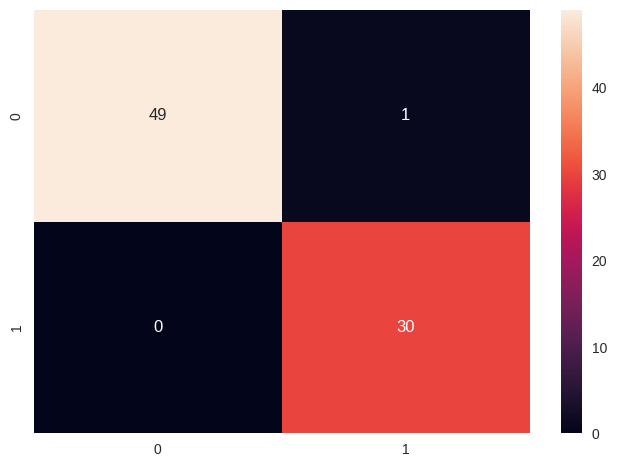

In [ ]:
# function that models using Random Forest and calculates accuracy and displays confusion matrix

def rfm(data):
  rfm = RandomForestClassifier()
  rfm.fit(x_train,y_train)
  rfm_pred = rfm.predict(x_test)
  print(classification_report(rfm_pred,y_test))
  sns.heatmap(confusion_matrix(y_test, rfm_pred), annot=True)

rfm(data)

In [ ]:
# summarizing the results of all the models including accuracy score

def model(data):
  global x_train,x_test,y_train,y_test
  x_train, x_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.20, random_state=50, stratify=y)

  # models
  logreg = LogisticRegression()
  knn = KNeighborsClassifier(15)
  dtree = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)
  rfm = RandomForestClassifier()

  models = {'LogReg': logreg, 'KNN': knn, 'DTree': dtree, 'Random Forest': rfm}
  results = []

  for name, model in models.items():
      x_train, x_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=50, stratify=y)
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)
      accuracy = accuracy_score(y_test, y_pred)
      tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
      results.append([name, accuracy, tn, tp])

  summary_table = pd.DataFrame(results, columns=['Model', 'Accuracy Score', 'TP', 'TN'])
  return summary_table

model(data)

Model  Accuracy Score  TP  TN
0         LogReg          0.9875  49  30
1            KNN          0.9875  49  30
2          DTree          0.9750  48  30
3  Random Forest          0.9875  49  30

In [ ]:
# bringing all the functions together for supervised learning, we have the following:

# function that imports file, reads file, and prints some basic information about the data in the file including number of missing rows per column.

def import_file(location):
  if isinstance(location, str):
    pd.set_option('display.max_columns', None)
    file_name = pd.read_csv(location)
    file_name = file_name.drop(file_name.columns[0], axis=1)
  return file_name

# function to rename columns in dataframe

def rename_columns(data, existing_columns, new_columns):
  for i in range(len(existing_columns)):
    data.rename(columns={existing_columns[i]: new_columns[i]}, inplace=True)
  return data.head(3)

# function to check datatype

def check_dtype(data):
  for i in data.columns:
    categorical = data.select_dtypes(include='object')
    numerical = data.select_dtypes(exclude='object')
  return categorical, numerical

# function to fill null rows

def fill_null(data):
  cat = data.select_dtypes(include='object')
  num = data.select_dtypes(include='number')
  for i in cat:
    data[i].fillna(data[i].mode()[0],inplace=True)
  for i in num:
    data[i].fillna(data[i].mean(),inplace=True)

# function that label encodes categorical data and standardises numerical data

def encoder(data):
  cat = data.select_dtypes(include='object')
  num = data.drop(data.columns[-1],axis=1).select_dtypes(exclude='object')
  encoder = LabelEncoder()
  for i in cat:
    data[i] = encoder.fit_transform(data[i])

  scaler = MinMaxScaler()
  for i in num:
    data[[i]] = scaler.fit_transform(data[[i]])

  return data

# function to select the best features using xgboost and selectKBest

def feature_selection(data):
  global x, y
  x = data.drop(data.columns[-1], axis=1)
  y = data.iloc[:,-1]

  # using xgb

  xgb_selector = XGBClassifier()
  xgb_selector(x,y)
  importances = pd.DataFrame(xgb_selector.feature_importances_)
  features = pd.DataFrame(x.columns)
  feature_importances = pd.concat([features, importances], axis=1)
  feature_importances.columns = ['Features', 'XGB_importances']
  feature_importances = feature_importances.sort_values(by='XGB_importances', ascending=False)
  feature_importances = feature_importances.loc[feature_importances['XGB_importances'] >= 0.01]

  # using selectKBest

  best_feature = SelectKBest(score_func = f_classif, k = 'all')
  fitting = best_feature.fit(x,y)
  scores = pd.DataFrame(fitting.scores_)
  columns = pd.DataFrame(x.columns)
  feat_score = pd.concat([columns, scores], axis = 1)
  feat_score.columns = ['Feature', 'F_classif_score']
  feat_score = feat_score.nlargest(10, 'F_classif_score')
  feat_score.sort_values(by = 'F_classif_score', ascending = False)

  # selecting only features that showed up in both xgbClassifier and selectKBest

  global selected_features
  xgb_list = list(feature_importances.iloc[:,0])
  k_list = list(feat_score.iloc[:,0])
  selected_features = []

  for i in xgb_list:
    if i in k_list:
      selected_features.append(i)

  # mapping out selected features from the main kidney dataset

  selected_features = data[selected_features]

  return selected_features

def model(data):
  global x_train,x_test,y_train,y_test
  x_train, x_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.20, random_state=50, stratify=y)

  # models
  logreg = LogisticRegression()
  knn = KNeighborsClassifier(15)
  dtree = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)
  rfm = RandomForestClassifier()

  models = {'LogReg': logreg, 'KNN': knn, 'DTree': dtree, 'Random Forest': rfm}
  results = []

  for name, model in models.items():
      x_train, x_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=50, stratify=y)
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)
      accuracy = accuracy_score(y_test, y_pred)
      tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
      results.append([name, accuracy, tn, tp])

  summary_table = pd.DataFrame(results, columns=['Model', 'Accuracy Score', 'TP', 'TN'])
  return summary_table

PART TWO - UNSUPERVISED LEARNING

Task 1: Drop out the target variable (named “classification”)

In [ ]:
new_data = data.copy()
new_data.drop(['class'], axis=1, inplace=True)
new_data.head(3)

age  blood_pressure  specific gravity  albumin  sugar  \
0  0.522727        0.230769              0.75      0.2    0.0   
1  0.056818        0.000000              0.75      0.8    0.0   
2  0.681818        0.230769              0.25      0.4    0.6   

   red blood cells  pus cell  pus cell clumps  bacteria  blood glucose random  \
0                1         1                0         0              0.211538   
1                1         1                0         0              0.269309   
2                1         1                0         0              0.856838   

   blood urea  serum creatinine    sodium  potassium  hemoglobin  \
0    0.088575          0.010582  0.839298   0.047803    0.836735   
1    0.042362          0.005291  0.839298   0.047803    0.557823   
2    0.132221          0.018519  0.839298   0.047803    0.442177   

   packed cell volume  white blood cell count  red blood cell count  \
0            0.814815                0.295455               0.65000   
1            0.703704                0.227273               0.58625   
2            0.574074                0.284091               0.58625   

   hypertension  diabetes mellitus  coronary artery disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   

   pedal edema  anemia  
0            0       0  
1            0       0  
2            0       1

<Axes: >

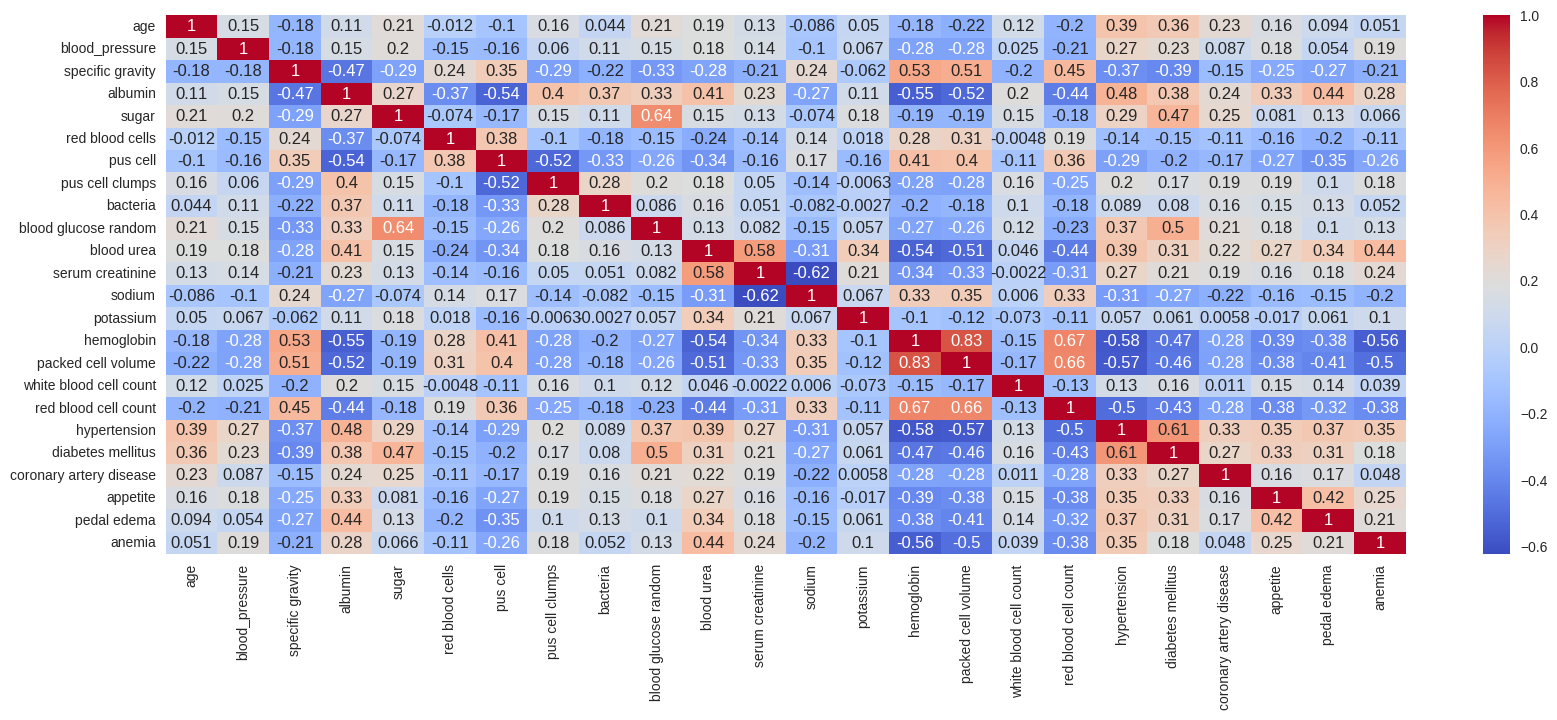

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(new_data.corr(), cmap = 'coolwarm', annot=True)

PCA

In [ ]:
# use PCA to achieve 90% of the original data

def pca(data):
  global pca
  pca = PCA(n_components = 0.90)
  pca.fit(data)
  global pca_data
  pca_data = pca.transform(data)
  pca_data = pd.DataFrame(pca_data)
  print('pca_data: ',pca_data.shape)
  print('new_data: ', new_data.shape)
  return(pca_data)

pca(new_data)

pca_data:  (400, 11)
new_data:  (400, 24)


0         1         2         3         4         5         6   \
0    0.256444 -0.814828 -0.214089 -0.002563 -0.083397 -0.062918  0.069146   
1   -0.536794  0.205231 -0.034807  0.010895 -0.101894  0.031829 -0.043064   
2    0.655521 -0.231498  0.333002  0.233113  0.803900  0.846681 -0.515313   
3    1.424758  1.147120  0.437870  0.581377  0.227356 -0.550485 -0.251090   
4   -0.476267  0.116596 -0.085165  0.014614 -0.027816  0.051757 -0.058263   
..        ...       ...       ...       ...       ...       ...       ...   
395 -0.731826  0.000485  0.004519 -0.017838  0.017979 -0.037316  0.000015   
396 -0.853039  0.003791  0.061746 -0.032050  0.001038 -0.079984  0.022507   
397 -0.798521  0.056424  0.043284 -0.015294 -0.017474  0.001434 -0.034034   
398 -0.830131  0.040608  0.071722 -0.000052 -0.022288 -0.031297 -0.007819   
399 -0.814153 -0.023890  0.035233 -0.031688  0.020283 -0.082894  0.035962   

           7         8         9         10  
0   -0.348186  0.136036  0.081061  0.215609  
1    0.055970 -0.252171 -0.041161  0.191158  
2    0.368036 -0.119288 -0.297904 -0.140497  
3   -0.210796 -0.336749  0.259609 -0.281283  
4    0.075419 -0.499888 -0.086848 -0.181004  
..        ...       ...       ...       ...  
395 -0.000683  0.034625 -0.009646 -0.029688  
396 -0.040401  0.232289  0.051749  0.128220  
397 -0.007998  0.018554 -0.029773  0.029734  
398 -0.010242  0.195053  0.017199  0.135515  
399 -0.034958  0.234971  0.042110  0.095911  

[400 rows x 11 columns]

In [ ]:
# function to rename columns in dataframe

def rename_columns(data, existing_columns, new_columns):
  for i in range(len(existing_columns)):
    data.rename(columns={existing_columns[i]: new_columns[i]}, inplace=True)
  return data.head(3)

# apply rename_columns function on the pca dataset

new_col_names = list(new_data.columns[0:11])
existing_col_names = list(range(0,11))
rename_columns(pca_data, existing_col_names, new_col_names)

age  blood_pressure  specific gravity   albumin     sugar  \
0  0.256444       -0.814828         -0.214089 -0.002563 -0.083397   
1 -0.536794        0.205231         -0.034807  0.010895 -0.101894   
2  0.655521       -0.231498          0.333002  0.233113  0.803900   

   red blood cells  pus cell  pus cell clumps  bacteria  blood glucose random  \
0        -0.062918  0.069146        -0.348186  0.136036              0.081061   
1         0.031829 -0.043064         0.055970 -0.252171             -0.041161   
2         0.846681 -0.515313         0.368036 -0.119288             -0.297904   

   blood urea  
0    0.215609  
1    0.191158  
2   -0.140497

Task 2:

- Use hierarchical clustering to identify the inherent groupings within your data
- Plot the clusters
- Plot the dendrogram

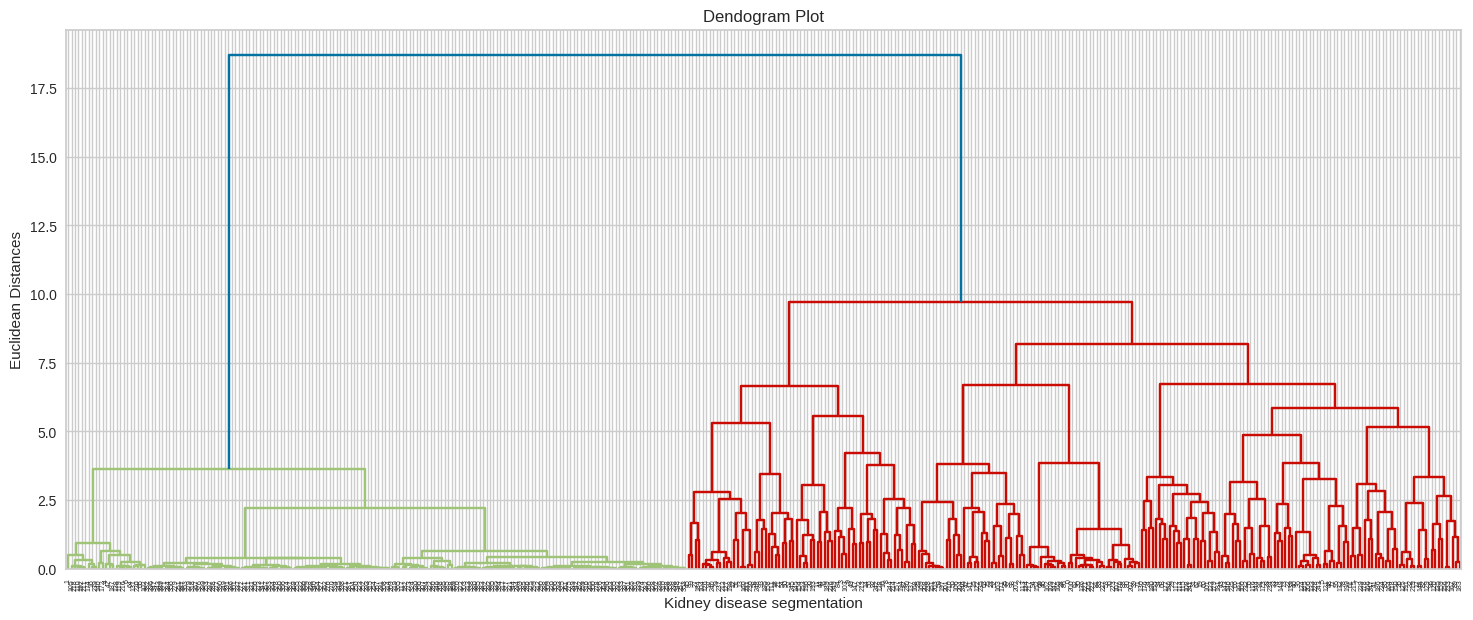

In [ ]:
plt.figure(figsize = (18, 7))
dendro = shc.dendrogram(shc.linkage(pca_data, method='ward'))
plt.title('Dendogram Plot')
plt.ylabel('Euclidean Distances')
plt.xlabel('Kidney disease segmentation')
plt.show()

In [ ]:
# find the optimal number of clusters using the elbow method

last = shc.linkage(pca_data, 'ward')[-10:, 2]
last_rev = last[::-1]
acc = np.diff(last, 2)
acc_rev = acc[::-1]
elbow_idx = np.argmax(acc_rev) + 2
n_clusters = elbow_idx
print('Optimal number of clusters: ', n_clusters)

Optimal number of clusters:  2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


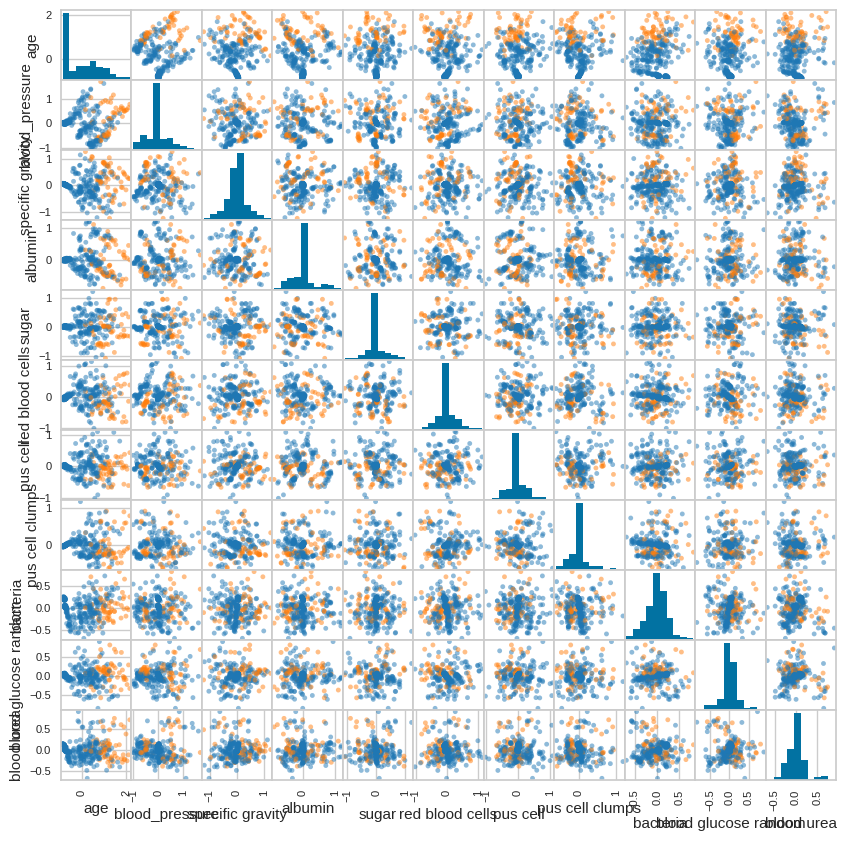

In [ ]:
# fit the pca_data to the agglomerative clustering model using the optimal number of clusters above

agg_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels = agg_model.fit_predict(pca_data)
agg_cluster = pd.DataFrame(clust_labels)

pca_data['cluster_h'] = clust_labels

# create a scatter plot matrix of the principal components

cmap = plt.get_cmap('tab10')

scatter_matrix(pca_data[['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea']], c=[cmap(i) for i in pca_data['cluster_h']], figsize=(10,10))
plt.show()

The model does not appear to have sufficient information to create distinct clusters across the features available. That said, of all the clustering options, the one of age against the other features appears to be the most informative.

As such, we will explore the potential relationships between age and the other features.

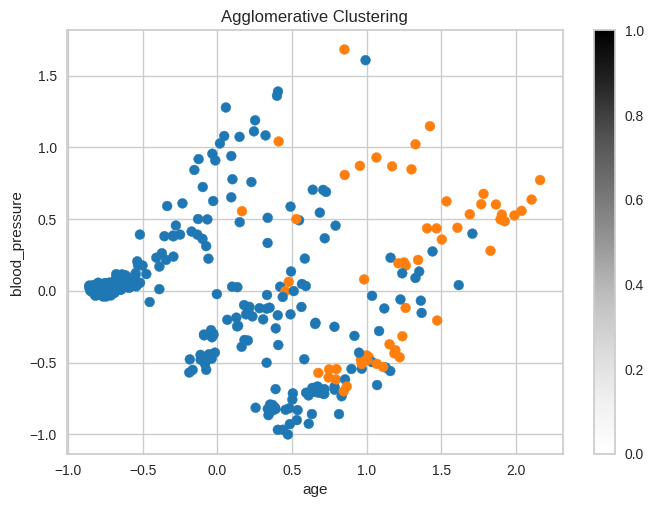

In [ ]:
# plot age and blood pressure

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['blood_pressure'] , c=[cmap(i) for i in pca_data['cluster_h']], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('blood_pressure')
plt.colorbar(scatter)

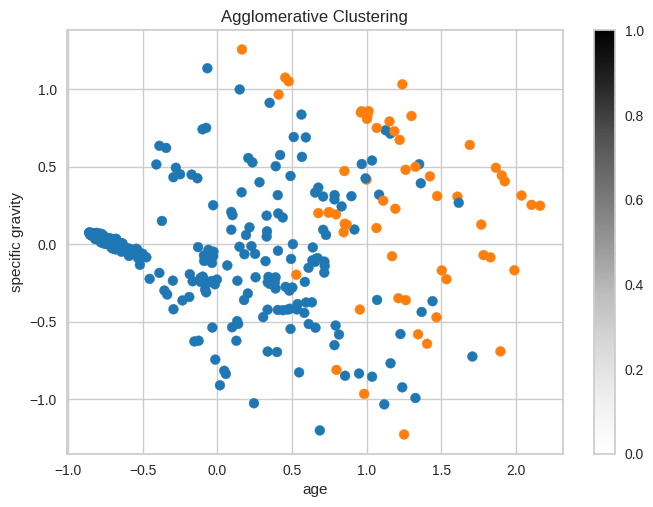

In [ ]:
# plot age and specific gravity

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['specific gravity'] , c=[cmap(i) for i in pca_data['cluster_h']], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('specific gravity')
plt.colorbar(scatter)

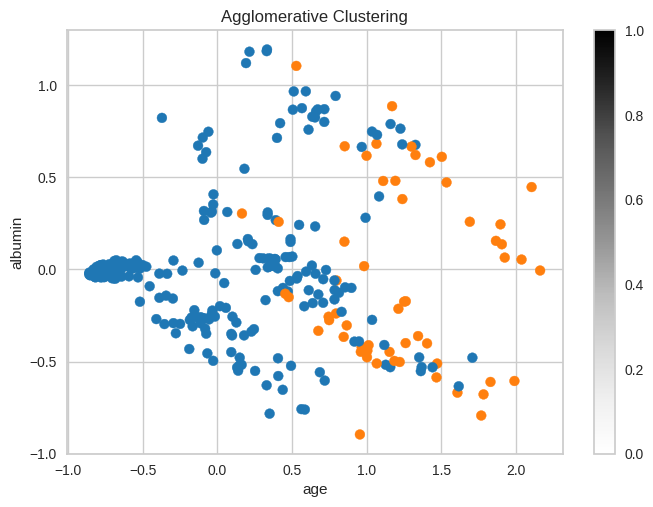

In [ ]:
# plot age and albumin

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['albumin'] , c=[cmap(i) for i in pca_data['cluster_h']], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('albumin')
plt.colorbar(scatter)

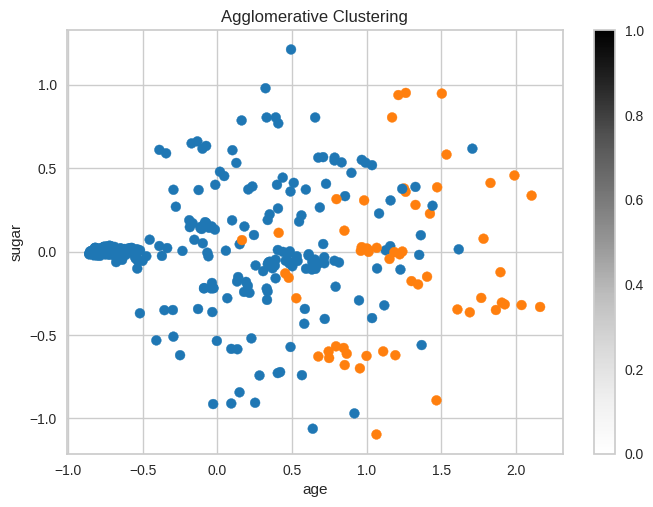

In [ ]:
# plot age and sugar

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['sugar'] , c=[cmap(i) for i in pca_data['cluster_h']], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('sugar')
plt.colorbar(scatter)

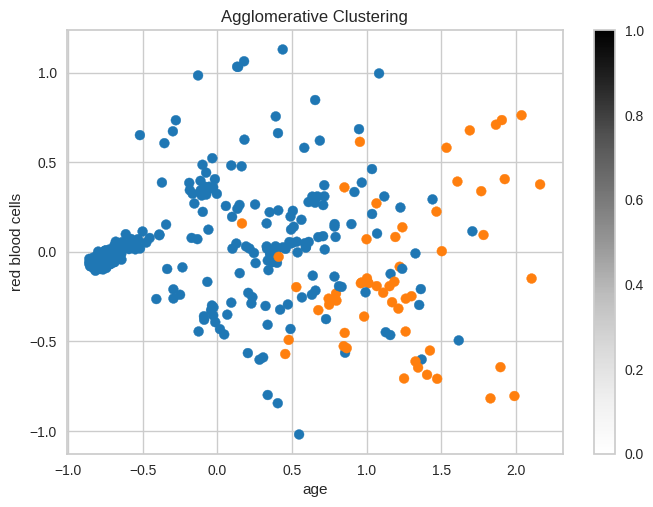

In [ ]:
# plot age and red blood cells

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['red blood cells'] , c=[cmap(i) for i in pca_data['cluster_h']], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('red blood cells')
plt.colorbar(scatter)

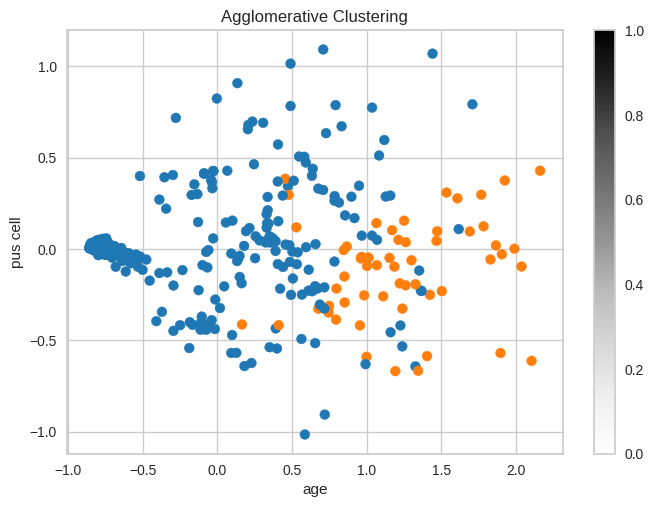

In [ ]:
# plot age and pus cell

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['pus cell'] , c=[cmap(i) for i in pca_data['cluster_h']], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('pus cell')
plt.colorbar(scatter)

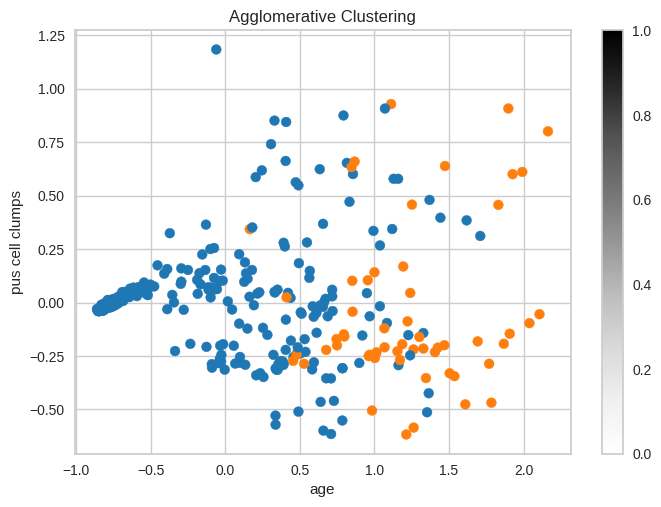

In [ ]:
# plot age and pus cell clumps

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['pus cell clumps'] , c=[cmap(i) for i in pca_data['cluster_h']], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('pus cell clumps')
plt.colorbar(scatter)

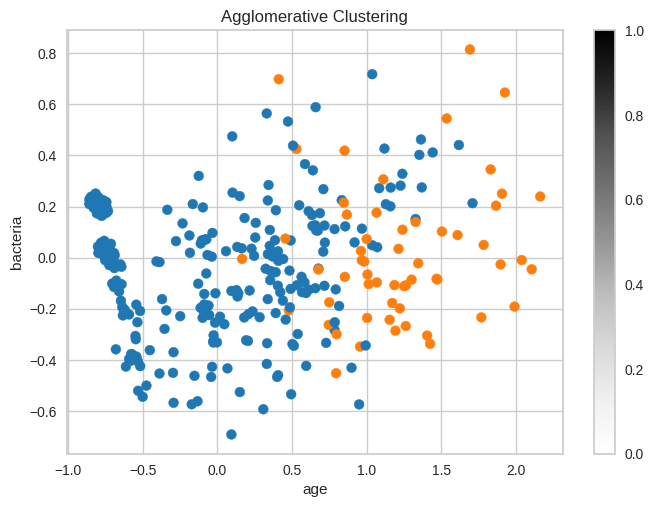

In [ ]:
# plot age and bacteria

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['bacteria'] , c=[cmap(i) for i in pca_data['cluster_h']], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('bacteria')
plt.colorbar(scatter)

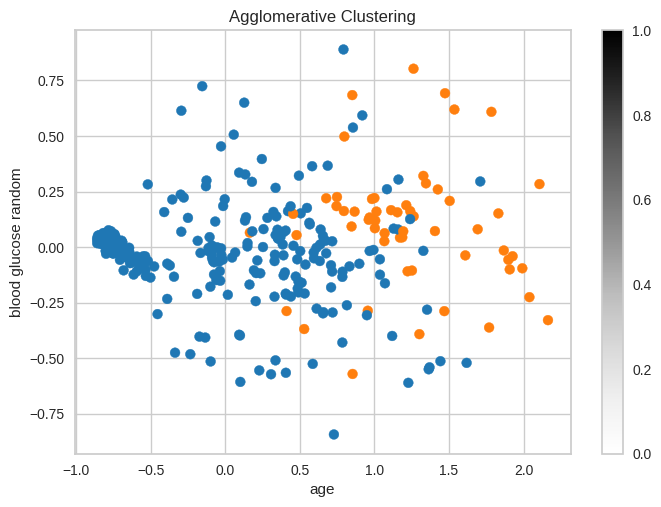

In [ ]:
# plot age and blood glucose random

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['blood glucose random'] , c=[cmap(i) for i in pca_data['cluster_h']], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('blood glucose random')
plt.colorbar(scatter)

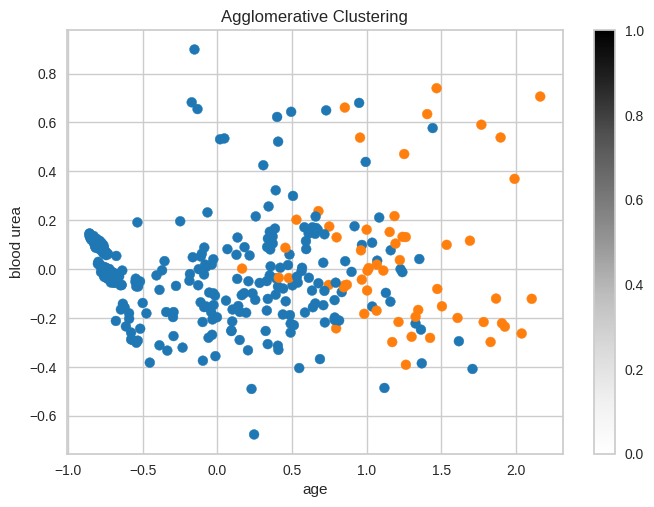

In [ ]:
# plot age and blood urea

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['blood urea'] , c=[cmap(i) for i in pca_data['cluster_h']], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('age')
ax.set_ylabel('blood urea')
plt.colorbar(scatter)

Interpretation:

Age does not appear to be a determinant of the specific gravity, sugar levels, red blood cells, pus cell clumps, bacteria, blood glucose random and blood urea. This implies that both younger and older people can have high or low levels of any of these measures depending on their lifestyles and other pre-existing health conditions, or genetic attributes.

On the other hand, we found that predominantly younger people tend to have higher albumin levels, red blood cells and pus cells.

Task 3:

- Use k-means clustering and select the optimal k
- Plot the clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

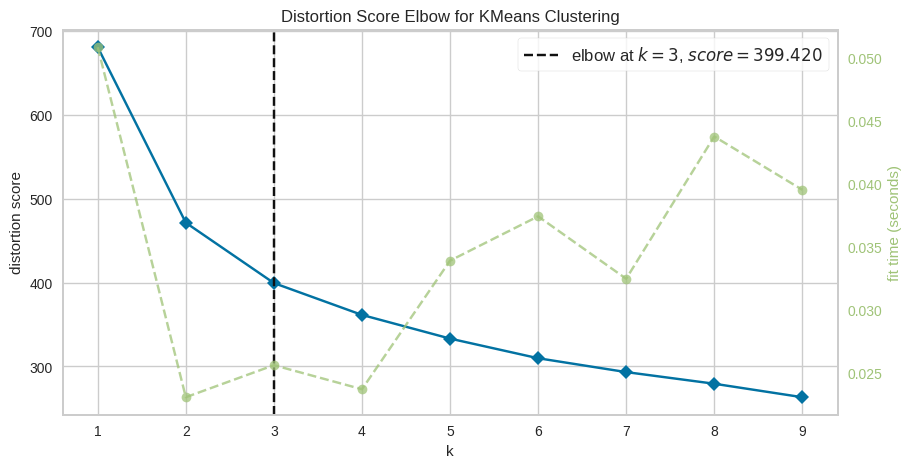

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = KMeans(random_state=10)
visualizer = KElbowVisualizer(km, k=(1,10))

plt.figure(figsize = (10, 5))
visualizer.fit(pca_data)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pca_data)

k_labels = pd.DataFrame(kmeans.labels_)

kmeans.predict(pca_data)
print(kmeans.cluster_centers_)

[[ 4.59141758e-01 -3.48950957e-01 -1.61354292e-01  9.24318329e-02
   2.79761038e-02  8.90978028e-02  5.90769381e-02 -2.87232610e-02
  -2.85636663e-02 -2.82407106e-02 -1.10223826e-02  8.47457627e-03]
 [ 1.24649523e+00  1.73598751e-01  2.51898864e-01 -9.98803175e-02
  -6.53124654e-02 -1.48037547e-01 -9.06790459e-02 -7.02462233e-03
   4.66942041e-02  5.29684529e-02  2.03036081e-02  8.75000000e-01]
 [-6.14469825e-01  1.37916940e-01  1.33866014e-02 -2.07092475e-02
   4.03127310e-03 -4.76668669e-03 -5.35605393e-03  1.76097277e-02
   1.75267692e-03 -2.64115300e-04  5.55150116e-06  1.94289029e-16]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


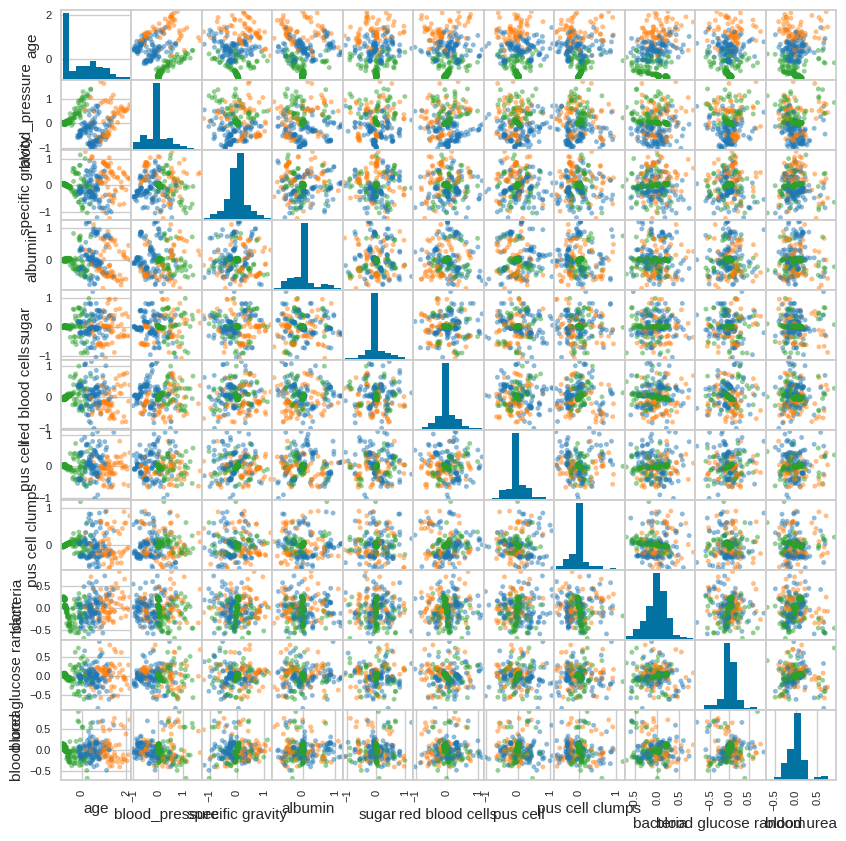

In [ ]:
# plot a scatter matrix to show the clear distinctions between and among the selected features
# add a column 'cluster' to df containing the predicted cluster labels

pca_data['cluster_k'] = k_labels

# create a scatter plot matrix of the principal components

cmap = plt.get_cmap('tab10')

scatter_matrix(pca_data[['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea']], c=[cmap(i) for i in pca_data['cluster_k']], figsize=(10,10))
plt.show()

Again, it appears we can see clearer clusters among age and the other features.

So, we will plot the age versus other features individually to better anlayse.

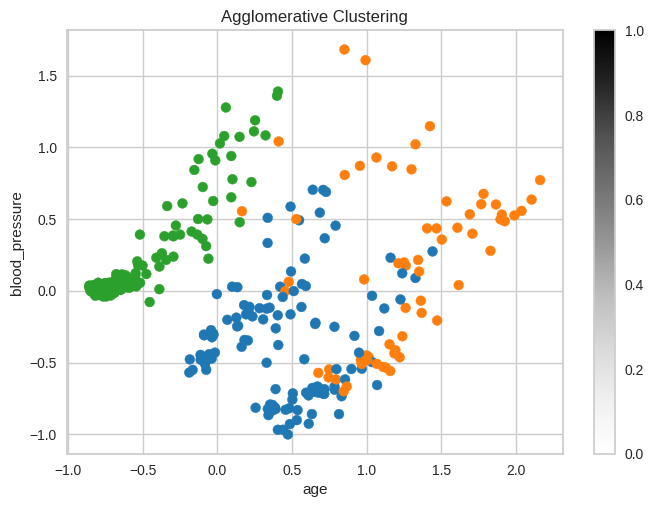

In [ ]:
# plot age and blood pressure

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['blood_pressure'] , c=[cmap(i) for i in pca_data['cluster_k']], s=50)
ax.set_title('K_Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('blood_pressure')
plt.colorbar(scatter)

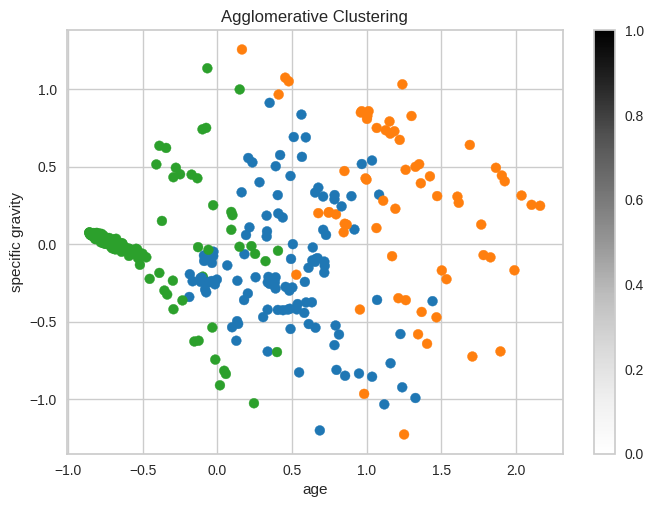

In [ ]:
# plot age and specific gravity

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['specific gravity'] , c=[cmap(i) for i in pca_data['cluster_k']], s=50)
ax.set_title('K_Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('specific gravity')
plt.colorbar(scatter)

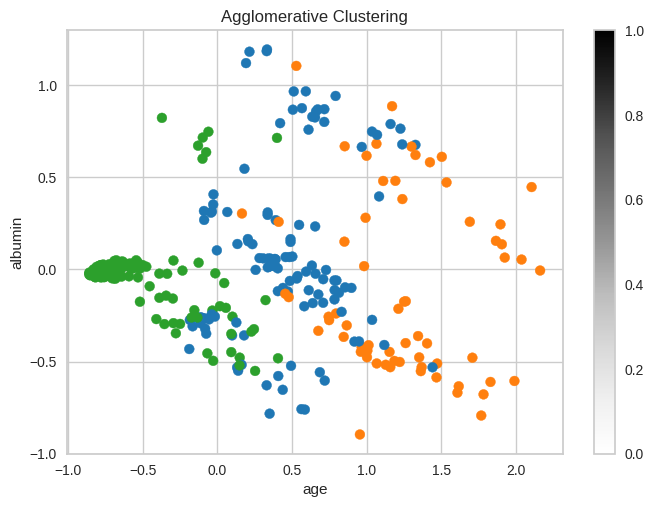

In [ ]:
# plot age and albumin

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['albumin'] , c=[cmap(i) for i in pca_data['cluster_k']], s=50)
ax.set_title('K_Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('albumin')
plt.colorbar(scatter)

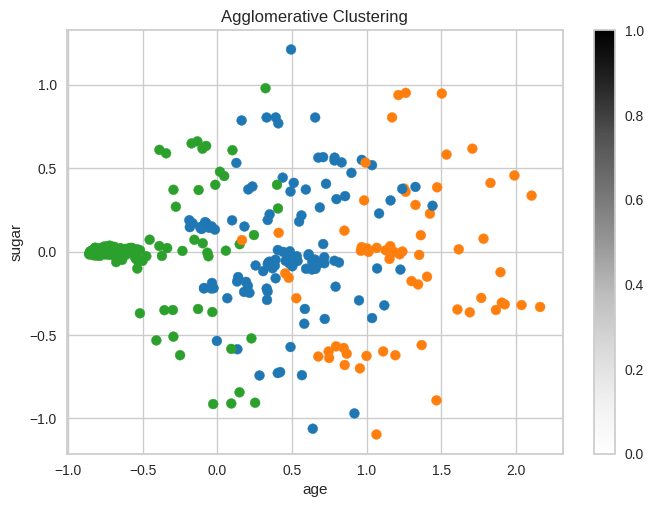

In [ ]:
# plot age and sugar

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['sugar'] , c=[cmap(i) for i in pca_data['cluster_k']], s=50)
ax.set_title('K_Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('sugar')
plt.colorbar(scatter)

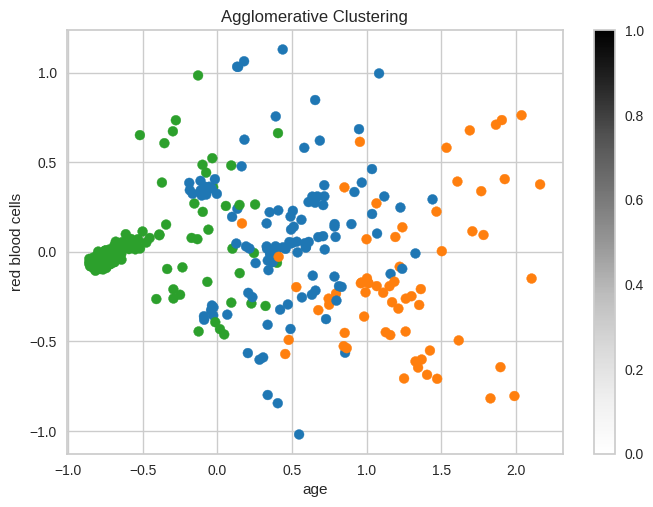

In [ ]:
# plot age and red blood cells

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['red blood cells'] , c=[cmap(i) for i in pca_data['cluster_k']], s=50)
ax.set_title('K_Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('red blood cells')
plt.colorbar(scatter)

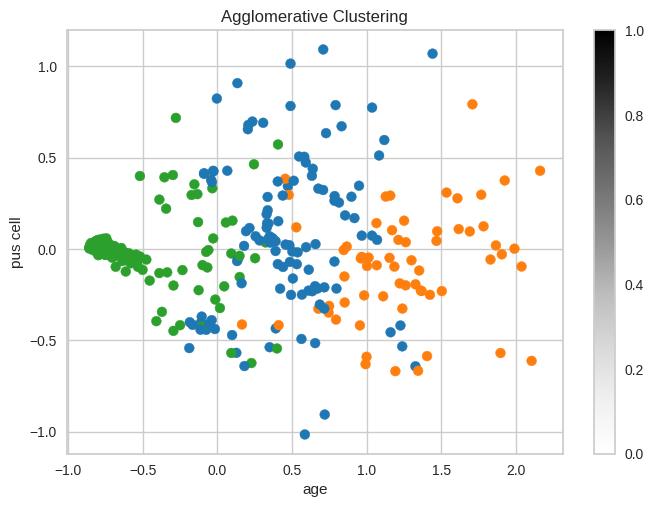

In [ ]:
# plot age and pus cell

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['pus cell'] , c=[cmap(i) for i in pca_data['cluster_k']], s=50)
ax.set_title('K_Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('pus cell')
plt.colorbar(scatter)

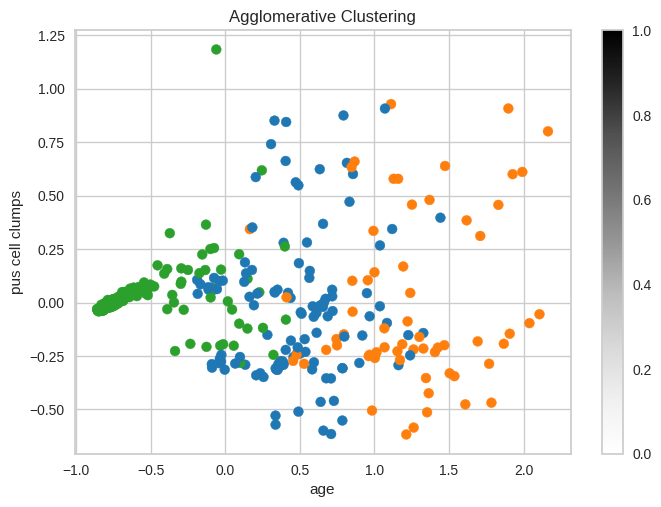

In [ ]:
# plot age and pus cell clumps

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['pus cell clumps'] , c=[cmap(i) for i in pca_data['cluster_k']], s=50)
ax.set_title('K_Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('pus cell clumps')
plt.colorbar(scatter)

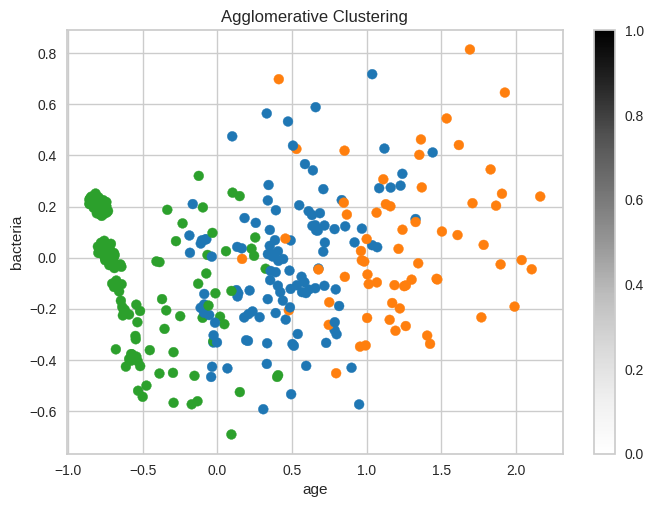

In [ ]:
# plot age and bacteria

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['bacteria'] , c=[cmap(i) for i in pca_data['cluster_k']], s=50)
ax.set_title('K_Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('bacteria')
plt.colorbar(scatter)

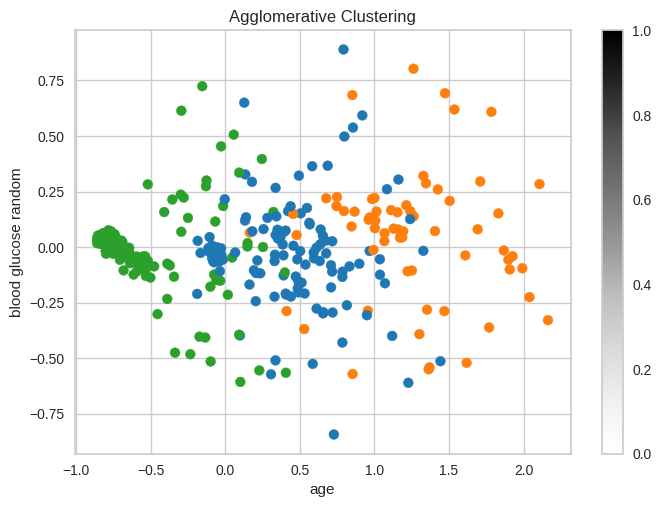

In [ ]:
# plot age and blood glucose random

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['blood glucose random'] , c=[cmap(i) for i in pca_data['cluster_k']], s=50)
ax.set_title('K_Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('blood glucose random')
plt.colorbar(scatter)

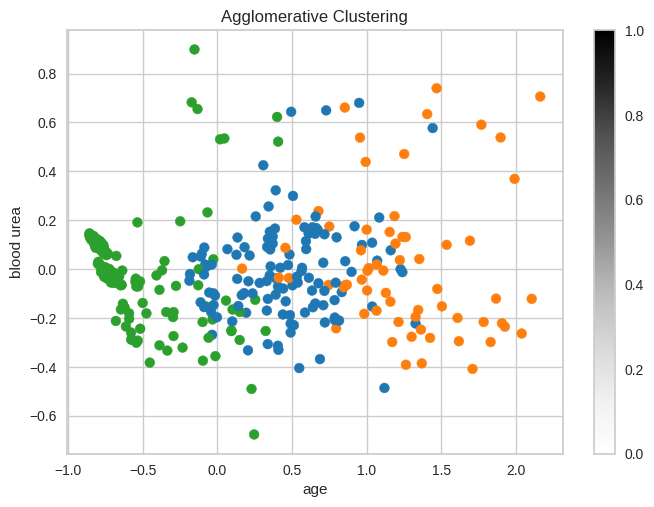

In [ ]:
# plot age and blood urea

cmap = plt.get_cmap('tab10')
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data['age'] , pca_data['blood urea'] , c=[cmap(i) for i in pca_data['cluster_k']], s=50)
ax.set_title('K_Means Clustering')
ax.set_xlabel('age')
ax.set_ylabel('blood urea')
plt.colorbar(scatter)

Interpretation:

Age does not appear to be a determining factor of the following conditions: specific gravity, sugar, blood glucose random and blood urea. This means that on average, people of different age groups have average levels of these conditions but in certain situations, they can be found to have higher or lower levels, depending on their lifestyle choices, pre-existing health conditions and/or genetic attributes.

Further, we observed the following from the cluster groups above:

1. people of very young or older age generally have higher bloood pressure than people of mid age

2. people of mid-age generally have higher albumin levels than people of young age or older age

3. younger and mid-age people generally have higher red blood cells than older people

4. mid-age people have higher pus cells than younger and older people

5. younger people generally have lower pus cell clumps, but in few extreme situations, they can have higher pus cell clumps than the other age groups

6. younger people have lower bacteria levsls than mid-age or older people